<i><h2 style="text-align:center;color:#004d80"> Prueba: Fundamentos Data Science (G25)</h2></i>
<i><h2 style="text-align:center;color:#004d80"> Desafío 1: Determinantes del ingreso </h2></i></i>
<i><h3 style="text-align:center;color:#FFFFF">by: Constanza Córdova </h3></i></i>


<h3 style="color:#004d80"> Preliminares </h3>

_**Descripción:**_ Se pide desarrollar un modelo predictivo sobre la probabilidad de que un individuo presente salarios por sobre o bajo los 50.000 dólares anuales de acuerdo a una serie de atrubutos: 

- `age`: edad del individuo
- `workclass`: Naturaleza de la organización que emplea al individuo
- `education`: Nivel educacional del individuo
- `capital-gains`: Ingresos generados por inversiones fuera del trabajo asalariado
- `capital-losses`: Pérdidas generadas por inversiones fuera del trabajo asalariado
- `fnlwgt`: Ponderador muestral
- `matrial-status`: Estado civil del individuo
- `occupation`: Ocupación del individuo 
- `relationship`: Relación respecto a su familia
- `race`: Raza
- `sex`: sexo
- `hours-per-week`: Cantidad de horas trabajadas por semana
- `native-country`: País de origen
        


Dada el contexto del problema, se determina que el modelo predictivo se realizará mediante aprendizaje automático supervisado de Clasificación binaria para el vector objetivo `income`, el cual tomará valores de 1 (>50K) y 0 (<=50K).

Las métricas que se utilizarán para evaluar el desempeño del modelo serán la Matriz de confusión, Precisión, Sensibilidad (Recall) y puntaje F1.

<h3 style="color:#004d80"> Aspectos </h3>

#### Aspectos Computacionales
**Python:** v 3.8.3

**Librerías:**
- pandas v 1.0.5
- numpy v 1.18.5
- matplotlib v 3.2.2
- scipy v 1.5.0
- seaborn v 0.10.1
- statsmodels v 0.11.1
- scikit-learn v 0.23.1


<h3 style="color:#004d80"> Descripción </h3>
En esta sección se generará un análisis descriptivo considerando el tipo de variables desde el punto de vista estadístico así como computacional

**1. Importación de librerías**

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

import funciones_set as fs

**2. Carga de DataFrame** 

In [2]:
df = pd.read_csv('income-db.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
df.shape

(48842, 15)

**3. Transformación de datos perdidos** 

In [4]:
df = df.replace('?', np.nan)
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


**4. Recodificación de las variables** 

Recodificamos la variable occupation

In [5]:
white_collar = ['Prof-specialty','Exec-managerial','Adm-clerical', 'Sales', 'Tech-support' ]
blue_collar = ['Craft-repair','Machine-op-inspct','Transport-moving', 'Handlers-cleaners', 'Farming-fishing', 'Protective-serv', 'Priv-house-serv']
other_collar = ['Other-service','Armed-Forces']

df['collar'] = df['occupation']
df['collar'] = df['collar'].replace(white_collar,'white-collar')
df['collar'] = df['collar'].replace(blue_collar,'blue-collar')
df['collar'] = df['collar'].replace(other_collar,'others')
print(df['collar'].value_counts())

white-collar    24819
blue-collar     16276
others           4938
Name: collar, dtype: int64


Observamos que se realizó la recodificación para la variable Occupation, correspondiente a la ocupación del individuo

Recodificamos workclass

In [6]:
federal_gov = ['Federal-gov']
state_level_gov = ['State-gov', 'Local-gov']
self_employed = ['Self-emp-inc', 'Self-emp-not-inc']
unemployed = ['Never-worked', 'Without-pay']
                 
df['workclass_recod'] = df['workclass']
df['workclass_recod'] = df['workclass_recod'].replace(federal_gov,'federal-gov')
df['workclass_recod'] = df['workclass_recod'].replace(state_level_gov,'state-level-gov')
df['workclass_recod'] = df['workclass_recod'].replace(self_employed,'self-employed')
df['workclass_recod'] = df['workclass_recod'].replace(unemployed,'unemployed')
df['workclass_recod'] = df['workclass_recod'].replace('Private','private')

print(df['workclass_recod'].value_counts())

private            33906
self-employed       5557
state-level-gov     5117
federal-gov         1432
unemployed            31
Name: workclass_recod, dtype: int64


Recodificamos education

In [7]:
preschool = ['Preschool']
elementary_school = ['1st-4th', '5th-6th']
high_school = ['7th-8th', '9th', '10th','11th', '12th', 'HS-grad']
college = ['Assoc-voc', 'Assoc-acdm', 'Some-college']
university = [ 'Bachelors', 'Masters', 'Prof-school', 'Doctorate']
                 
df['educ_recod'] = df['education']
df['educ_recod'] = df['educ_recod'].replace(preschool,'Preschool')
df['educ_recod'] = df['educ_recod'].replace(elementary_school,'elementary-school')
df['educ_recod'] = df['educ_recod'].replace(high_school,'high-school')
df['educ_recod'] = df['educ_recod'].replace(college,'college')
df['educ_recod'] = df['educ_recod'].replace(university,'university')

print(df['educ_recod'].value_counts())

high-school          21353
college              14540
university           12110
elementary-school      756
Preschool               83
Name: educ_recod, dtype: int64


Recodificamos marital-status

In [8]:
married = ['Married-civ-spouse', 'Married-spouse-absent','Married-AF-spouse']
divorced = ['Divorced']
separated = ['Separated']
widowed = ['Widowed']
                 
df['civstatus'] = df['marital-status']
df['civstatus'] = df['civstatus'].replace(married,'married')
df['civstatus'] = df['civstatus'].replace(divorced,'divorced')
df['civstatus'] = df['civstatus'].replace(separated,'separated')
df['civstatus'] = df['civstatus'].replace(widowed,'widowed')

print(df['civstatus'].value_counts())

married          23044
Never-married    16117
divorced          6633
separated         1530
widowed           1518
Name: civstatus, dtype: int64


Recodificamos native-country como region

In [9]:
americas = ['Antigua and Barbuda', 'Argentina', 'Bahamas', 'Barbados',
       'Belize', 'Bolivia', 'Brazil', 'Canada', 'Chile', 'Columbia',
       'Costa Rica', 'Cuba', 'Dominica', 'Dominican Republic', 'Ecuador',
       'El Salvador', 'Grenada', 'Guatemala', 'Guyana', 'Haiti',
       'Honduras', 'Jamaica', 'Mexico', 'Nicaragua', 'Panama', 'Paraguay',
       'Peru', 'Puerto-Rico', 'Dominican-Republic', 'El-Salvador','Saint Kitts/Nevis', 'Saint Lucia',
       'St Vincent/Grenadines', 'South', 'Suriname', 'Trinadad&Tobago',
       'United-States', 'Uruguay', 'Venezuela', 'Outlying-US(Guam-USVI-etc)']

africa = ['Algeria', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi',
       'Cameroon', 'Cape Verde', 'Central African Rep', 'Chad', 'Comoros',
       'Congo', 'Congo (Dem Rep)', "Cote d'Ivoire", 'Djibouti', 'Egypt',
       'Equatorial Guinea', 'Eritrea', 'Ethiopia', 'Gabon', 'Gambia',
       'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia',
       'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius',
       'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda',
       'Sao Tome/Principe', 'Senegal', 'Seychelles', 'Sierra Leone',
       'Somalia', 'South Africa', 'Sudan*', 'Swaziland', 'Tanzania',
       'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe']

asia = ['Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh',
       'Bhutan', 'Brunei Darussalam', 'Cambodia', 'China', 'Cyprus',
       'Georgia', 'Hong', 'China', 'India', 'Indonesia', 'Iran',
       'Iraq', 'Israel', 'Japan', 'Jordan', 'Kazakhstan', 'Kuwait',
       'Kyrgyzstan', 'Laos', 'Lebanon', 'Malaysia', 'Maldives', 'Mongolia',
       'Myanmar', 'Nepal', 'North Korea', 'Oman', 'Pakistan',
       'Palestinian Territory', 'Philippines', 'Qatar', 'Saudi Arabia',
       'Singapore', 'South Korea', 'Sri Lanka', 'Syria', 'Tajikistan',
       'Thailand', 'Timor-Leste', 'Turkey', 'Turkmenistan', 'Taiwan',
       'United Arab Emirates', 'Uzbekistan', 'Vietnam', 'Yemen']

europe = ['Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium',
       'Bosnia/Herzegovina', 'Bulgaria', 'Croatia', 'Czech Republic',
       'Denmark', 'Estonia', 'England', 'Finland', 'France', 'Germany', 'Greece',
       'Hungary','Holand-Netherlands', 'Iceland', 'Ireland', 'Italy', 'Latvia',
       'Liechtenstein', 'Lithuania', 'Luxembourg', 'Macedonia', 'Malta',
       'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'Norway',
       'Poland', 'Portugal', 'Romania', 'Russian Federation',
       'San Marino', 'Serbia', 'Slovakia','Scotland', 'Slovenia', 'Spain', 'Sweden',
       'Switzerland', 'Ukraine', 'United Kingdom', 'Yugoslavia']

oceania = ['Angola', 'Australia', 'Fiji', 'Kiribati', 'Marshall Is',
       'Micronesia', 'Nauru', 'New Zealand', 'Palau', 'Papua New Guinea',
       'Samoa', 'Solomon Islands', 'Tonga', 'Tuvalu', 'Vanuatu']

df['region'] = df['native-country']
df['region'] = df['region'].replace(americas,'america')
df['region'] = df['region'].replace(africa,'africa')
df['region'] = df['region'].replace(asia,'asia')
df['region'] = df['region'].replace(europe,'europe')
df['region'] = df['region'].replace(oceania,'oceania')

print(df['region'].value_counts())

america    46224
asia         981
europe       780
Name: region, dtype: int64


Se observa que la clase mayoritaria de región es américa

Recodificamos income, asignamos valor 1 para la clase minoritaria, es decir >50K

In [10]:
df['income_recod'] = np.where(df['income'] == '>50K',1,0)
print(df['income_recod'].value_counts())

0    37155
1    11687
Name: income_recod, dtype: int64


Consultamos las columnas del dataframe

In [11]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income', 'collar', 'workclass_recod', 'educ_recod', 'civstatus',
       'region', 'income_recod'],
      dtype='object')

Simplificamos el dataframe con las variables recodificadas para facilitar el análisis

In [12]:
df_recod = df.copy().loc[:,['age', 'workclass_recod', 'educ_recod', 'capital-gain', 'capital-loss', 
 'fnlwgt', 'civstatus', 'collar', 'relationship', 'race', 'gender', 'hours-per-week', 'region', 'income_recod']]
df_recod.head()

,age,workclass_recod,educ_recod,capital-gain,capital-loss,fnlwgt,civstatus,collar,relationship,race,gender,hours-per-week,region,income_recod
0,25,private,high-school,0,0,226802,Never-married,blue-collar,Own-child,Black,Male,40,america,0
1,38,private,high-school,0,0,89814,married,blue-collar,Husband,White,Male,50,america,0
2,28,state-level-gov,college,0,0,336951,married,blue-collar,Husband,White,Male,40,america,1
3,44,private,college,7688,0,160323,married,blue-collar,Husband,Black,Male,40,america,1
4,18,NaN,college,0,0,103497,Never-married,NaN,Own-child,White,Female,30,america,0


In [13]:
df_recod.describe(include= 'all')

,age,workclass_recod,educ_recod,capital-gain,capital-loss,fnlwgt,civstatus,collar,relationship,race,gender,hours-per-week,region,income_recod
count,48842.000000,46043,48842,48842.000000,48842.000000,4.884200e+04,48842,46033,48842,48842,48842,48842.000000,47985,48842.000000
unique,NaN,5,5,NaN,NaN,NaN,5,3,6,5,2,NaN,3,NaN
top,NaN,private,high-school,NaN,NaN,NaN,married,white-collar,Husband,White,Male,NaN,america,NaN
freq,NaN,33906,21353,NaN,NaN,NaN,23044,24819,19716,41762,32650,NaN,46224,NaN
mean,38.643585,NaN,NaN,1079.067626,87.502314,1.896641e+05,NaN,NaN,NaN,NaN,NaN,40.422382,NaN,0.239282
std,13.710510,NaN,NaN,7452.019058,403.004552,1.056040e+05,NaN,NaN,NaN,NaN,NaN,12.391444,NaN,0.426649
min,17.000000,NaN,NaN,0.000000,0.000000,1.228500e+04,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.000000
25%,28.000000,NaN,NaN,0.000000,0.000000,1.175505e+05,NaN,NaN,NaN,NaN,NaN,40.000000,NaN,0.000000
50%,37.000000,NaN,NaN,0.000000,0.000000,1.781445e+05,NaN,NaN,NaN,NaN,NaN,40.000000,NaN,0.000000
75%,48.000000,NaN,NaN,0.000000,0.000000,2.376420e+05,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,0.000000


Observamos que existen 5 variables numéricas:
    - age, capital-gain, capital-loss, fnlwgt, hours-per-week


Adicionalmente análizamos los casos perdidos y vemos que la variable con mayor cantidad de valores perdidos es collar, que corresponde a la ocupación

In [14]:
fs.valores_perdidos(df_recod)

Variable:  age || Valores perdidos:  0 

Variable:  workclass_recod || Valores perdidos:  2799 

Variable:  educ_recod || Valores perdidos:  0 

Variable:  capital-gain || Valores perdidos:  0 

Variable:  capital-loss || Valores perdidos:  0 

Variable:  fnlwgt || Valores perdidos:  0 

Variable:  civstatus || Valores perdidos:  0 

Variable:  collar || Valores perdidos:  2809 

Variable:  relationship || Valores perdidos:  0 

Variable:  race || Valores perdidos:  0 

Variable:  gender || Valores perdidos:  0 

Variable:  hours-per-week || Valores perdidos:  0 

Variable:  region || Valores perdidos:  857 

Variable:  income_recod || Valores perdidos:  0 



Eliminamos las celdas con valores perdidos

In [15]:
df_recod = df_recod.dropna()
print(f'Se eliminaron {df.shape[0] - df_recod.shape[0]} observaciones del data set')

Se eliminaron 3620 observaciones del data set


**Inspección variable objetivo** 

- Inspeccionamos las variables numéricas agrupadas por ingreso:

In [16]:
df_recod.groupby('income_recod').mean()

,age,capital-gain,capital-loss,fnlwgt,hours-per-week
income_recod,,,,,
0,36.749427,149.023402,54.032428,190175.214235,39.372023
1,44.006067,3991.791667,193.487063,188397.967345,45.690489


Se observa que las personas con ingreso sobre 50K tienen una edad promedio mayor, asimismo el ingreso y perdida promedio generadas por inversiones fuera del trabajo es mayor respecto a las personas con ingreso inferior o igual a 50K. además se observa que el promedio de horas trabajadas por semana es mayor para las personas con ingreso >50K

- Inspeccionamos algunas las variables categoricas: 

In [17]:
df_recod.groupby('workclass_recod').mean()

,age,capital-gain,capital-loss,fnlwgt,hours-per-week,income_recod
workclass_recod,,,,,,
federal-gov,42.593172,924.485064,109.179943,183752.510669,41.433144,0.390469
private,36.889633,886.123127,80.611223,192616.517429,40.258925,0.217702
self-employed,45.499449,2784.520581,126.465454,176236.583058,45.684123,0.362183
state-level-gov,40.833333,759.960959,94.713635,187028.208086,40.193024,0.284384
unemployed,47.285714,325.238095,89.857143,167902.666667,33.952381,0.095238


comentario sobre workclass: Se observa que las personas que trabajan por cuenta propia poseen mayor ingreso promedio generado por inversiones que el resto de llas clases de trabajo 

In [17]:
df_recod.groupby('educ_recod').mean()

,age,capital-gain,capital-loss,fnlwgt,hours-per-week,income_recod
educ_recod,,,,,,
Preschool,41.097222,843.833333,47.097222,234546.388889,36.791667,0.013889
college,36.636214,605.069734,75.300187,188735.377478,40.078189,0.216386
elementary-school,43.353204,298.609538,63.783905,236164.365127,38.953800,0.044709
high-school,38.492107,501.490483,64.510989,190495.681844,40.034922,0.138216
university,40.584421,2767.119863,147.459388,186579.057040,43.646631,0.487339


comentario sobre educ: se observa que las personas con educación universitaria tienen mayor ingreso promedio por inversiones respecto a las otras clases. Además las personas con educación universitaria poseen un mayor promedio en income_recod, lo que podría indicarnos que el ingreso sobre 50K puede estar fuertemente relacionado al nivel de educación universitario 

In [18]:
df_recod.groupby('relationship').mean()

,age,capital-gain,capital-loss,fnlwgt,hours-per-week,income_recod
relationship,,,,,,
Husband,43.357388,1776.909782,123.286403,187094.066860,44.610683,0.455748
Not-in-family,38.041702,812.411981,77.097505,190760.198599,41.039566,0.104939
Other-relative,33.498147,213.679021,53.180875,204134.913269,37.323944,0.037064
Own-child,25.210534,188.226230,39.609267,194019.597193,33.320857,0.015847
Unmarried,40.294904,471.875731,47.211362,191361.588764,39.442565,0.063074
Wife,39.969393,1597.063128,116.098996,180975.285988,37.477762,0.485892


comentario sobre relationship: Se obserba que las personas que tienen una relación respecto a su familia como 'Esposa' o 'Esposo' son las tienen un mayor promedio de ingresos e perdidas por inversión. Asimismo se observa que son las clases con mayor promedio en income_recod

**Inspección visual de las variables**

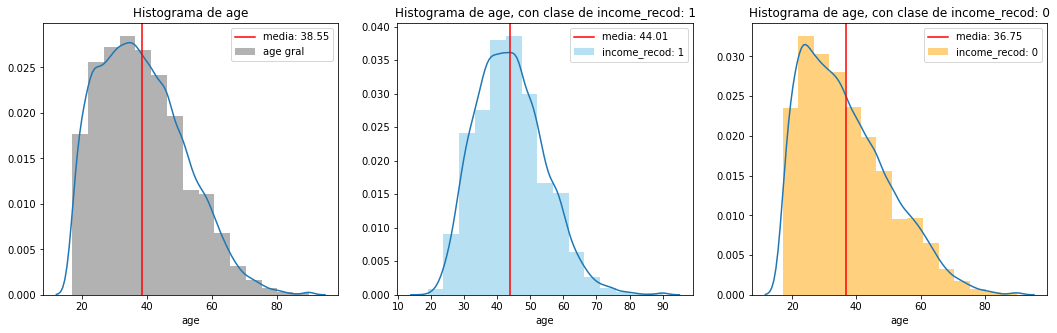

In [19]:
fs.histograma_clases(df_recod, 'age', 'income_recod', 15)

comentario: Como se observa en la distribución de edades categorizadas por clase, se puede ver que las personas con ingreso menor o igual a 50K presentan una distribución asimetrica con sesgo positivo. Además la media de edad de estas personas es menor (36.7) que la edad promedio de la clase con ingresos mayores a 50K (media: 44 años) 

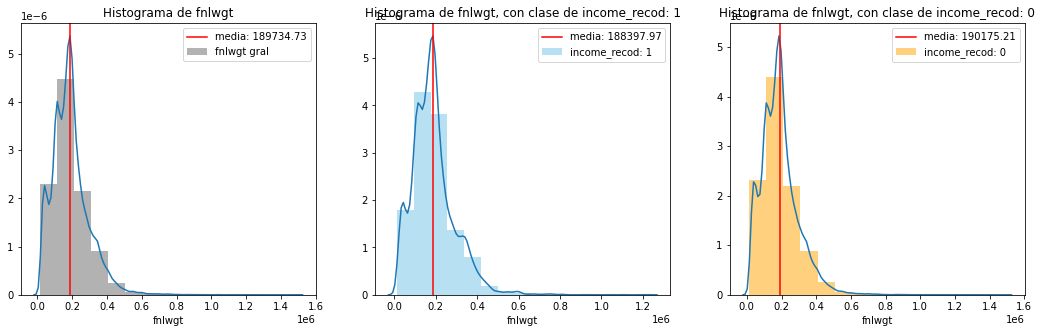

In [20]:
fs.histograma_clases(df_recod, 'fnlwgt', 'income_recod', 15)

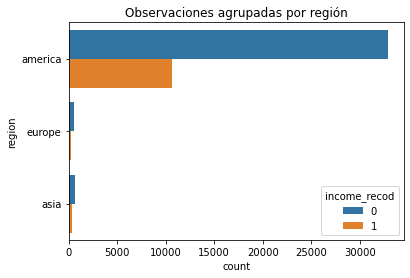

In [21]:
plt.title('Observaciones agrupadas por región')
sns.countplot(y= 'region', hue = 'income_recod', data= df_recod)

Comentarios: Se observa que la clase mayoritaria para región es américa, por lo que el dataframe se encuentra desbalanceado para esta clase.

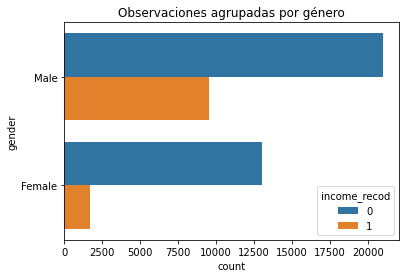

In [22]:
plt.title('Observaciones agrupadas por género')
sns.countplot(y= 'gender', hue = 'income_recod', data= df_recod)

comentarios: Se observa que existe la mayor proporción de personas que poseen ingresos superiores a 50k son de genero masculino

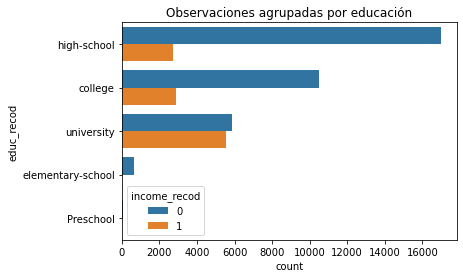

In [23]:
plt.title('Observaciones agrupadas por educación')
sns.countplot(y= 'educ_recod', hue = 'income_recod', data= df_recod)

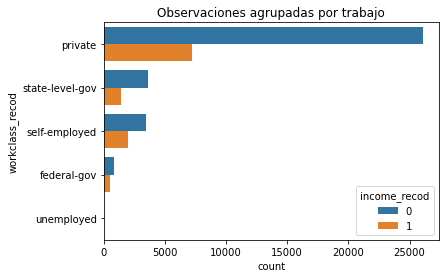

In [24]:
plt.title('Observaciones agrupadas por trabajo')
sns.countplot(y= 'workclass_recod', hue = 'income_recod', data= df_recod)

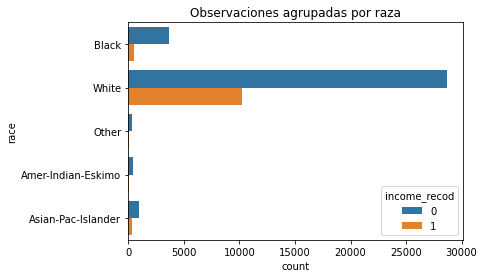

In [25]:
plt.title('Observaciones agrupadas por raza')
sns.countplot(y= 'race', hue = 'income_recod', data= df_recod)

**Aplicamos OneHotEncoding al DataFrame** 

Transformamos las variables de clases a binarias con el método de Pandas get_dummies

In [26]:
df_dummy = pd.get_dummies(df_recod, drop_first= True)
df_dummy.sample()

,age,capital-gain,capital-loss,fnlwgt,hours-per-week,income_recod,workclass_recod_private,workclass_recod_self-employed,workclass_recod_state-level-gov,workclass_recod_unemployed,...,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Male,region_asia,region_europe
34137,57,0,0,237691,40,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [52]:
df_dummy.columns

Index(['age', 'capital_gain', 'capital_loss', 'fnlwgt', 'hours_per_week',
       'income_recod', 'workclass_recod_private',
       'workclass_recod_self_employed', 'workclass_recod_state_level_gov',
       'workclass_recod_unemployed', 'educ_recod_college',
       'educ_recod_elementary_school', 'educ_recod_high_school',
       'educ_recod_university', 'civstatus_divorced', 'civstatus_married',
       'civstatus_separated', 'civstatus_widowed', 'collar_others',
       'collar_white_collar', 'relationship_not_in_family',
       'relationship_other_relative', 'relationship_own_child',
       'relationship_unmarried', 'relationship_wife',
       'race_asian_pac_islander', 'race_black', 'race_other', 'race_white',
       'gender_male', 'region_asia', 'region_europe'],
      dtype='object')

In [28]:
print(f'Se crearon {df_dummy.shape[1] - df_recod.shape[1]} columnas binarias')

Se crearon 18 columnas binarias


Hacemos una iteración para estandarizar el nombre de las columnas, convirtiendo todos los guiones a guión bajo y letra minúscula

In [29]:
for col_name in list(df_dummy.columns):
    df_dummy.rename(columns= {col_name: col_name.replace('-','_').lower()}, inplace = True)

In [30]:
df_dummy.head()

,age,capital_gain,capital_loss,fnlwgt,hours_per_week,income_recod,workclass_recod_private,workclass_recod_self_employed,workclass_recod_state_level_gov,workclass_recod_unemployed,...,relationship_own_child,relationship_unmarried,relationship_wife,race_asian_pac_islander,race_black,race_other,race_white,gender_male,region_asia,region_europe
0,25,0,0,226802,40,0,1,0,0,0,...,1,0,0,0,1,0,0,1,0,0
1,38,0,0,89814,50,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
2,28,0,0,336951,40,1,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0
3,44,7688,0,160323,40,1,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
5,34,0,0,198693,30,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0


<h3 style="color:#004d80"> Modelación descriptiva </h3>
En esta sección se busca definir cuáles son los principales determinantes del objeto de estudio.

Definimos la variable objetivo y la lista de las variables independientes

In [31]:
y_var = ['income_recod']
x_var = list(df_dummy.columns)
x_var.remove('income_recod')

In [32]:
x_var_logit = ' + '.join(x_var)

In [33]:
x_var_logit

'age + capital_gain + capital_loss + fnlwgt + hours_per_week + workclass_recod_private + workclass_recod_self_employed + workclass_recod_state_level_gov + workclass_recod_unemployed + educ_recod_college + educ_recod_elementary_school + educ_recod_high_school + educ_recod_university + civstatus_divorced + civstatus_married + civstatus_separated + civstatus_widowed + collar_others + collar_white_collar + relationship_not_in_family + relationship_other_relative + relationship_own_child + relationship_unmarried + relationship_wife + race_asian_pac_islander + race_black + race_other + race_white + gender_male + region_asia + region_europe'

In [34]:
modelo_logit = smf.logit( 'income_recod ~' + x_var_logit , df_dummy).fit()

Optimization terminated successfully.
         Current function value: 0.335416
         Iterations 11


In [35]:
modelo_logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           income_recod   No. Observations:                45222
Model:                          Logit   Df Residuals:                    45190
Method:                           MLE   Df Model:                           31
Date:                Mon, 07 Dec 2020   Pseudo R-squ.:                  0.4010
Time:                        15:03:40   Log-Likelihood:                -15168.
converged:                       True   LL-Null:                       -25322.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                         -11.9096      4.081     -2.918      0.004     -19.908      -3.911
age                                 0.0239      0.001     17.920      0.000       0.021       0.027
capital_gain                        0.0003   8.56e-06     37.244      0.000       0.000       0.000
capital_loss                        0.0007   3.05e-05     21.779      0.000       0.001       0.001
fnlwgt                            6.97e-07   1.39e-07      5.009      0.000    4.24e-07     9.7e-07
hours_per_week                      0.0300      0.001     22.913      0.000       0.027       0.033
workclass_recod_private            -0.4798      0.075     -6.409      0.000      -0.627      -0.333
workclass_recod_self_employed      -0.8012      0.082     -9.791      0.000      -0.962      -0.641
workclass_recod_state_level_gov    -0.5014      0.083     -6.006      0.000      -0.665      -0.338
workclass_recod_unemployed         -1.4161      0.790     -1.792      0.073      -2.965       0.133
educ_recod_college                  6.5399      4.071      1.607      0.108      -1.439      14.519
educ_recod_elementary_school        4.5894      4.076      1.126      0.260      -3.399      12.577
educ_recod_high_school              5.9477      4.071      1.461      0.144      -2.031      13.926
educ_recod_university               7.4437      4.071      1.828      0.067      -0.535      15.423
civstatus_divorced                  0.5095      0.072      7.080      0.000       0.368       0.651
civstatus_married                   1.2843      0.136      9.470      0.000       1.019       1.550
civstatus_separated                 0.4608      0.134      3.431      0.001       0.198       0.724
civstatus_widowed                   0.5912      0.132      4.492      0.000       0.333       0.849
collar_others                      -0.7385      0.086     -8.546      0.000      -0.908      -0.569
collar_white_collar                 0.6687      0.035     19.051      0.000       0.600       0.738
relationship_not_in_family         -0.9625      0.133     -7.250      0.000      -1.223      -0.702
relationship_other_relative        -1.4671      0.186     -7.899      0.000      -1.831      -1.103
relationship_own_child             -1.9909      0.165    -12.035      0.000      -2.315      -1.667
relationship_unmarried             -1.2019      0.149     -8.050      0.000      -1.495      -0.909
relationship_wife                   1.0526      0.084     12.564      0.000       0.888       1.217
race_asian_pac_islander             0.6790      0.219      3.106      0.002       0.250       1.107
race_black                          0.2928      0.190      1.540      0.123      -0.080       0.665
race_other                          0.2111      0.271      0.780      0.435      -0.319       0.742
race_white                          0.5602      0.181      3.099      0.002       0.206       0.914
gender_male                         0.777

Se obtuvo un modelo con pseudo R2 = 0.4010.

Considerando un 95% de significancia, del modelo anterior se observa lo siguiente:
- Se observa que para la variable workclass_recod la clase unemployed no es estadisticamente signiticativa. Esto se puede deber a que es la clase minoritaria del dataframe por lo que no hay suficiente información para poder generar un modelo descriptivo con la clase unemployed 
- Para la variable educ_recod se observa que todas las clases en estudio no son estadisticamente significativas, por lo que no se puede concluir que exista una asociación estadísticamente significativa entre las variables y la variable objetivo.
- Para la variable race se observa que las clases black y other no son estadisticamente significativas. 
- Para la variable region se observa que la clase asia no es estadísticamente significativa


Dado los resultados obtenidos, se propone hacer una reducción del modelo excluyendo las variables relacionadas con educación dado que ninguna variable fue estadisticamente significatima. Adicionalmente, se proprone reducir las variables race_black, race_other y la region asia

In [36]:
excluir = ['educ_recod_college', 'educ_recod_elementary_school', 'educ_recod_high_school',
          'educ_recod_university', 'race_black', 'race_other',
          'region_asia']

In [37]:
x_var_refact = x_var.copy()

for variable in excluir:
    x_var_refact.remove(variable)

In [38]:
x_var_refact

['age',
 'capital_gain',
 'capital_loss',
 'fnlwgt',
 'hours_per_week',
 'workclass_recod_private',
 'workclass_recod_self_employed',
 'workclass_recod_state_level_gov',
 'workclass_recod_unemployed',
 'civstatus_divorced',
 'civstatus_married',
 'civstatus_separated',
 'civstatus_widowed',
 'collar_others',
 'collar_white_collar',
 'relationship_not_in_family',
 'relationship_other_relative',
 'relationship_own_child',
 'relationship_unmarried',
 'relationship_wife',
 'race_asian_pac_islander',
 'race_white',
 'gender_male',
 'region_europe']

In [39]:
x_var_logit_refact = ' + '.join(x_var_refact)

In [40]:
modelo_logit_refactorizado = smf.logit( 'income_recod ~' + x_var_logit_refact , df_dummy).fit()

Optimization terminated successfully.
         Current function value: 0.353154
         Iterations 9


In [41]:
modelo_logit_refactorizado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           income_recod   No. Observations:                45222
Model:                          Logit   Df Residuals:                    45197
Method:                           MLE   Df Model:                           24
Date:                Mon, 07 Dec 2020   Pseudo R-squ.:                  0.3693
Time:                        15:03:54   Log-Likelihood:                -15970.
converged:                       True   LL-Null:                       -25322.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          -5.3848      0.190    -28.414      0.000      -5.756      -5.013
age                                 0.0208      0.001     16.249      0.000       0.018       0.023
capital_gain                        0.0003   8.28e-06     38.727      0.000       0.000       0.000
capital_loss                        0.0007   2.93e-05     23.629      0.000       0.001       0.001
fnlwgt                           6.023e-07   1.34e-07      4.482      0.000    3.39e-07    8.66e-07
hours_per_week                      0.0313      0.001     24.406      0.000       0.029       0.034
workclass_recod_private            -0.5225      0.073     -7.156      0.000      -0.666      -0.379
workclass_recod_self_employed      -0.7927      0.080     -9.927      0.000      -0.949      -0.636
workclass_recod_state_level_gov    -0.2708      0.081     -3.343      0.001      -0.430      -0.112
workclass_recod_unemployed         -1.7022      0.792     -2.149      0.032      -3.255      -0.150
civstatus_divorced                  0.3825      0.070      5.451      0.000       0.245       0.520
civstatus_married                   1.1584      0.131      8.875      0.000       0.903       1.414
civstatus_separated                 0.2741      0.132      2.083      0.037       0.016       0.532
civstatus_widowed                   0.3205      0.129      2.493      0.013       0.069       0.572
collar_others                      -0.7024      0.085     -8.261      0.000      -0.869      -0.536
collar_white_collar                 1.2704      0.031     40.866      0.000       1.209       1.331
relationship_not_in_family         -0.8857      0.128     -6.942      0.000      -1.136      -0.636
relationship_other_relative        -1.6337      0.181     -9.027      0.000      -1.988      -1.279
relationship_own_child             -2.1027      0.161    -13.065      0.000      -2.418      -1.787
relationship_unmarried             -1.2088      0.144     -8.419      0.000      -1.490      -0.927
relationship_wife                   0.9914      0.082     12.122      0.000       0.831       1.152
race_asian_pac_islander             0.5763      0.097      5.922      0.000       0.386       0.767
race_white                          0.3829      0.056      6.821      0.000       0.273       0.493
gender_male                         0.8578      0.063     13.660      0.000       0.735       0.981
region_europe                       0.2218      0.102      2.174      0.030       0.022       0.422
===================================================================================================
"""

Del nuevo modelo se observa que tosas las variables son estadisticamente significativas con un 95% de nivel de covianza. Se observa que el estado civil married y collar white son lo que aportan en mayor grado en la probabilidad de del modelo 

<h3 style="color:#004d80"> Modelación Predictiva </h3>
En esta sección se implementará una solución analítica que aumente las métricas de desempeño

**Generar subconjunto de entrenamiento y prueba**

In [42]:
y_vector = df_dummy.loc[:, 'income_recod']

In [43]:
x_matriz = df_dummy.loc[:, x_var]

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x_matriz, y_vector, test_size=.33,random_state=1901)

**Estandarizar la matriz de entrenamiento y de validación**

In [45]:
x_train_std = StandardScaler().fit_transform(x_train)

x_test_std = StandardScaler().fit_transform(x_test)

**Implementación de modelo LogisticRegession**

In [46]:
modelo_logit_ml = LogisticRegression().fit(x_train_std, y_train)

In [54]:
modelo_logit_ml.coef_

array([[ 0.3221603 ,  2.49569707,  0.25414245,  0.04946836,  0.35901879,
        -0.18084488, -0.23347356, -0.13057401, -0.01297761,  1.02222823,
         0.05030807,  0.80969097,  1.34926262,  0.17728596,  0.69041636,
         0.05478425,  0.0878694 , -0.2716314 ,  0.33278492, -0.36840025,
        -0.23503189, -0.6509979 , -0.34134278,  0.22948266,  0.11405818,
         0.0622548 ,  0.02286291,  0.1539263 ,  0.36498707, -0.03402668,
         0.02071563]])

In [55]:
modelo_logit_ml.intercept_

array([-1.81851816])

**Predicción del modelo**

In [47]:
prediccion = modelo_logit_ml.predict(x_test_std)
pred_prob = modelo_logit_ml.predict_proba(x_test_std)

**Matriz de confusión**

In [48]:
from sklearn.metrics import confusion_matrix

mx_confusion = confusion_matrix(y_test, prediccion)
mx_conf_pd = pd.crosstab(y_test, prediccion)
mx_conf_pd

col_0,0,1
income_recod,,
0,10398,903
1,1403,2220


In [49]:
y_test.value_counts()

0    11301
1     3623
Name: income_recod, dtype: int64

In [50]:
print(classification_report(y_test, prediccion))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90     11301
           1       0.71      0.61      0.66      3623

    accuracy                           0.85     14924
   macro avg       0.80      0.77      0.78     14924
weighted avg       0.84      0.85      0.84     14924



El modelo tiene un 85% de exactitud. Se observa que la precisión para la clase 1 es del 71%, esto significa que el modelo predijo en total 3123 casos positivos, de los cuales 29% de las predicciones fueron Falsos positivos. Respecto a recall vemos que solo el 61% de las personas con sueldo mayor a 50K fueron predichas correctamente.

De lo anterior vemos que el modelo tiene un buen desempeño para predecir la clase 0 (ingreso <=50K). Sin embargo tiene un mal desempeño para predecir la clase 1 (Ingreso <50K) la cual es la clase minoritaria a la cual buscamos medir su probabilidad de ocurrencia. Por lo anterior, se podría depurar el modelo para poder mejorar la precisión de las predicciones y balancear las clases